# Olivine-Liquid thermometry
- This script shows how to use the various options for olivine-liquid thermometry, including tests for equilibrium
- It also shows how to calculate equilibrium olivine compositions from a measured liquid composition
- we recomend you first got through the "Liquid_only thermometry.ipynb" example, as this demonstrates the various options for H2O and P which are also relevant here. 
- You can download the excel spreadsheet here for Liq-ol (paired up): https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Liquid_Ol_Liq_Themometry/Liquid_only_Thermometry.xlsx
- And the spreadsheet for individual Ol and Liquid here: 
https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Liquid_Ol_Liq_Themometry/2018_Olivines_Glasses.xlsx


### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

In [2]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [3]:
pt.__version__

'1.0.60'

In [4]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Step 1 - load data

In [5]:
out=pt.import_excel('Liquid_only_Thermometry.xlsx', sheet_name="Ol-Liq")
my_input=out['my_input']
myLiquids1=out['Liqs']
myOls1=out['Ols']
display(myOls1.head())
display(myLiquids1.head())

,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol
0,40.5,0.02,0.08,12.40,0.17,47.4,0.30,0.0,0,0.03,0.0,0
1,41.3,0.03,0.11,9.59,0.14,50.2,0.31,0.0,0,0.00,0.0,1
2,39.7,0.05,0.11,15.60,0.18,44.5,0.31,0.0,0,0.03,0.0,2
3,40.5,0.05,0.10,13.20,0.18,46.8,0.29,0.0,0,0.02,0.0,3
4,40.5,0.00,0.10,9.41,0.10,49.3,0.31,0.0,0,0.00,0.0,4


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,57.023602,0.623106,16.332899,4.36174,0.103851,4.19180,6.94858,3.59702,0.896895,0.000000,0.226584,5.59,0.2,0.0,0.0,0.0,0
1,57.658600,0.654150,17.194799,3.90621,0.084105,2.86892,5.91538,3.85948,1.018600,0.000000,0.214935,6.55,0.2,0.0,0.0,0.0,1
2,60.731201,0.862054,17.144199,4.07781,0.077488,2.50867,5.22075,4.45556,1.414160,0.000000,0.319638,3.14,0.2,0.0,0.0,0.0,2
3,61.532799,0.440860,16.508801,3.32990,0.037520,1.64150,4.34294,4.40860,1.407000,0.000000,0.215740,6.20,0.2,0.0,0.0,0.0,3
4,52.969101,0.803412,17.563000,5.93217,0.149472,3.78351,7.65110,3.80219,0.551178,0.037368,0.196182,6.58,0.2,0.0,0.0,0.0,4


## Example 1 - Olivine-Liquid temperatures
- It has been shown many times that olivines are not in equilirium with their co-erupted carrier melts. Thus, it is difficult to know what a meaningful Ol-Liq match is. Because of this, by default we return the value of Kd calculated for olivine-liquid as well as the calculated temperature in the "calculate_ol_liq_temp" function.
- The function uses the Fe3Fet_Liq column in the user-entered spreadsheet, and calculates Fe/Mg in the liquid using only Fe2+ by default. 
- You can also specify a Fe3Fet_Liq ratio in the function itself (see later examples) to overwrite this value.
- If the user doesn't specify a column for Fe3Fet in the input, this value is set to zero. 

### 1a - Putirka eq 22

In [36]:
eq22_PHinput=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  equationT="T_Put2008_eq19", 
                                      P=10)
eq22_PHinput

,T_K_calc,Kd (Fe-Mg) Meas
0,1435.738761,0.314264
1,1368.216698,0.175383
2,1375.309023,0.269582
3,1315.676661,0.173799
4,1380.045476,0.152172
5,1369.355910,0.159554
6,1365.514876,0.215915
7,1431.936899,0.404699
8,1378.168553,0.314115
9,1457.309545,0.429135


In [38]:
eq22_PHinput=pt.calculate_liq_only_temp(liq_comps=myLiquids1,  equationT="T_Helz1987_MgO", 
                                      P=10)
eq22_PHinput

0    1371.405182
1    1344.815294
2    1337.574269
3    1320.144150
4    1363.198550
5    1352.896499
6    1340.922325
7    1372.994089
8    1350.683086
9    1394.664497
Name: MgO_Liq, dtype: float64

### 1b - Specify eq_tests=True
- FIf you specify eq_tests=True, the function also returns calculated Kd values for olivine-Liquid pairs so you can assess if olivine-liquids are in equilibrium. 
- A number of different equilibrium tests are returned, using Toplis, Matzen and Roeder and Emslie (preferred value=0.3 for Roeder and Emslie, 1970, =0.34 for Matzen, function of melt comp, temp and press for Toplis). 
- As before, here the Fe3Fet_Liq ratio in the spreadsheet is being used for calculations.

In [7]:
eq22_PHinput=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT="T_Put2008_eq22", P=my_input['P_kbar'], eq_tests=True)
eq22_PHinput

,T_K_calc,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)","ΔKd, Shea (M-P)",SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol,P2O5_Ol,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,1289.947705,0.314264,0.325040,-0.010776,0.014264,-0.025736,-0.020736,57.023602,0.623106,16.332899,...,0,0,0.0,0,0,9.472619,0.170395,0.557471,-0.761843,9.819071
1,1229.813416,0.175383,0.308684,-0.133301,-0.124617,-0.164617,-0.159617,57.658600,0.654150,17.194799,...,0,0,0.0,1,0,14.186789,0.137941,0.570023,-0.816654,10.303635
2,1285.857491,0.269582,0.315891,-0.046309,-0.030418,-0.070418,-0.065418,60.731201,0.862054,17.144199,...,0,0,0.0,2,0,15.531216,0.122184,0.579288,-0.792785,10.250501
3,1198.240159,0.173799,0.296719,-0.122920,-0.126201,-0.166201,-0.161201,61.532799,0.440860,16.508801,...,0,0,0.0,3,0,23.753206,0.097626,0.605753,-0.767076,10.715090
4,1259.174284,0.152172,0.323766,-0.171594,-0.147828,-0.187828,-0.182828,52.969101,0.803412,17.563000,...,0,0,0.0,4,0,10.781292,0.186877,0.523030,-0.842157,10.215321
5,1244.931462,0.159554,0.324986,-0.165432,-0.140446,-0.180446,-0.175446,54.050201,0.857348,17.333300,...,0,0,0.0,5,0,12.276130,0.168070,0.533835,-0.833465,10.295063
6,1241.300118,0.215915,0.333878,-0.117963,-0.084085,-0.124085,-0.119085,55.656300,0.897984,17.117800,...,0,0,0.0,6,0,14.083460,0.145845,0.547483,-0.820914,10.324021
7,1199.601831,0.404699,0.391378,0.013321,0.104699,0.064699,0.069699,49.054699,0.488832,14.665000,...,0,0,0.0,7,0,7.372298,0.220053,0.554209,-0.789502,9.845140
8,1162.693468,0.314115,0.361834,-0.047718,0.014115,-0.025885,-0.020885,50.625099,0.334074,16.875000,...,0,0,0.0,8,0,10.509878,0.180293,0.551305,-0.873502,10.229233
9,1339.466029,0.429135,0.299720,0.129416,0.129135,0.089135,0.094135,51.403301,0.663880,18.019600,...,0,0,0.0,9,0,7.070601,0.228386,0.498172,-0.840523,9.673734


- If you want to access just the temperature from this panda dataframe, you do name['column heading']
- To get the output in Celcius, subtract -273.15

In [8]:
Teq22_PHinput=eq22_PHinput['T_K_calc']-273.15 #converting temp to C
Teq22_PHinput

0    1016.797705
1     956.663416
2    1012.707491
3     925.090159
4     986.024284
5     971.781462
6     968.150118
7     926.451831
8     889.543468
9    1066.316029
Name: T_K_calc, dtype: float64

- Can also filter outputs, to only look at temps for pairs with delta K<=0.03 using the pandas loc function.
- This basically says "give me the rows of eq22_PHinput where the column "ΔKd, Roeder" is less than or equal to 0.03 (e.g., in equilibrium)
- Only 2 Ol-Liq pairs are in equilibrium here!

In [9]:
T_in_eq=eq22_PHinput.loc[eq22_PHinput['ΔKd, Roeder (M-P)']<=0.03]
T_in_eq

,T_K_calc,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)","ΔKd, Shea (M-P)",SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol,P2O5_Ol,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,1289.947705,0.314264,0.325040,-0.010776,0.014264,-0.025736,-0.020736,57.023602,0.623106,16.332899,...,0,0,0.0,0,0,9.472619,0.170395,0.557471,-0.761843,9.819071
1,1229.813416,0.175383,0.308684,-0.133301,-0.124617,-0.164617,-0.159617,57.658600,0.654150,17.194799,...,0,0,0.0,1,0,14.186789,0.137941,0.570023,-0.816654,10.303635
2,1285.857491,0.269582,0.315891,-0.046309,-0.030418,-0.070418,-0.065418,60.731201,0.862054,17.144199,...,0,0,0.0,2,0,15.531216,0.122184,0.579288,-0.792785,10.250501
3,1198.240159,0.173799,0.296719,-0.122920,-0.126201,-0.166201,-0.161201,61.532799,0.440860,16.508801,...,0,0,0.0,3,0,23.753206,0.097626,0.605753,-0.767076,10.715090
4,1259.174284,0.152172,0.323766,-0.171594,-0.147828,-0.187828,-0.182828,52.969101,0.803412,17.563000,...,0,0,0.0,4,0,10.781292,0.186877,0.523030,-0.842157,10.215321
5,1244.931462,0.159554,0.324986,-0.165432,-0.140446,-0.180446,-0.175446,54.050201,0.857348,17.333300,...,0,0,0.0,5,0,12.276130,0.168070,0.533835,-0.833465,10.295063
6,1241.300118,0.215915,0.333878,-0.117963,-0.084085,-0.124085,-0.119085,55.656300,0.897984,17.117800,...,0,0,0.0,6,0,14.083460,0.145845,0.547483,-0.820914,10.324021
8,1162.693468,0.314115,0.361834,-0.047718,0.014115,-0.025885,-0.020885,50.625099,0.334074,16.875000,...,0,0,0.0,8,0,10.509878,0.180293,0.551305,-0.873502,10.229233


### 1c - You can also overwrite the spreadsheet Fe3Fet_Liq in the function itself
- Here, we peform calculations using 30% Fe3+

In [10]:
eq22_PHinput_30Fe3=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT="T_Put2008_eq22", P=my_input['P_kbar'], 
                                        Fe3Fet_Liq=0.3)
eq22_PHinput_30Fe3

,T_K_calc,Kd (Fe-Mg) Meas
0,1290.324455,0.359158
1,1230.140630,0.200438
2,1286.367233,0.308094
3,1198.532903,0.198628
4,1259.546319,0.173911
5,1245.276632,0.182347
6,1241.721961,0.246761
7,1199.614504,0.462513
8,1162.740690,0.358989
9,1339.482412,0.490441


## Example 2 - Considering all liquid-olivine matches
- In reality, you have probably measured a load of glasses, and a load of olivines, but you dont know which ones match with which.
- So, we have a matching algorithm, that returns all possible olivine-liquid pairs, which you can then filter. 
- Lets load the olivines and liquids separatly, as they will likely be different lenghts (and if you put them in one spreasdheet, you'll end up with a load of NaNs which will cause issues!)

In [11]:
# Loading in matrix glasses
out2018MG=pt.import_excel('2018_Olivines_Glasses.xlsx', sheet_name="LL4_MGs", suffix='_Liq')
my_input_MGs2018=out2018MG['my_input']
MGs2018=out2018MG['Liqs']

out2018Ols=pt.import_excel('2018_Olivines_Glasses.xlsx', sheet_name="LL4_Ols")
my_input_Ols2018=out2018Ols['my_input']
Ols2018=out2018Ols['Ols']

In [12]:
display(MGs2018.head())
display(Ols2018.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,50.6243,2.8773,13.0360,11.8288,0.1830,5.8471,10.2471,2.5120,0.5234,0.0,0.2689,0.0,0.0,0.0,0.0,0.0,0
1,50.0975,2.8840,12.8885,11.2897,0.1769,5.8521,9.9658,2.4681,0.5305,0.0,0.2652,0.0,0.0,0.0,0.0,0.0,1
2,50.1346,2.8741,12.8953,11.8696,0.1814,5.8682,10.2012,2.4618,0.5778,0.0,0.2875,0.0,0.0,0.0,0.0,0.0,2
3,50.5233,2.8765,12.9818,11.3536,0.1454,5.8673,10.1806,2.6206,0.5206,0.0,0.2759,0.0,0.0,0.0,0.0,0.0,3
4,51.5840,2.9055,13.3290,11.5014,0.2286,5.8450,10.0408,2.1722,0.5565,0.0,0.2693,0.0,0.0,0.0,0.0,0.0,4


,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol
0,39.65300,0.0,0.04025,15.12365,0.20515,44.36500,0.25190,0.0,0.0,0.0,0.30635,0
1,39.79465,0.0,0.04405,12.84395,0.16570,45.94980,0.23245,0.0,0.0,0.0,0.37605,1
2,40.14520,0.0,0.04705,11.68440,0.14900,46.74595,0.23320,0.0,0.0,0.0,0.38705,2
3,39.53345,0.0,0.05060,16.92675,0.22125,43.10860,0.23345,0.0,0.0,0.0,0.26300,3
4,40.02325,0.0,0.05610,11.42200,0.15300,47.16475,0.22890,0.0,0.0,0.0,0.38110,4


In [13]:
eq22_PHinput_30Fe3_Matching=pt.calculate_ol_liq_temp_matching(liq_comps=MGs2018,
                                        ol_comps=Ols2018,  
                                      equationT="T_Put2008_eq22", P=5, 
                                        Fe3Fet_Liq=0.3, eq_tests=True)
eq22_PHinput_30Fe3_Matching

Considering N=23 Ol & N=19 Liqs, which is a total of N=437 Liq-Ol pairs, be patient if this is >>1 million!


,T_K_calc,Ol_Fo_Meas,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)","ΔKd, Shea (M-P)",SiO2_Liq,TiO2_Liq,...,ID_Ol,Si_Ol_cat_frac,Mg_Ol_cat_frac,Fet_Ol_cat_frac,Ca_Ol_cat_frac,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac
0,1423.494959,0.839462,0.168506,0.287209,-0.118703,-0.131494,-0.171494,-0.166494,50.6243,2.87730,...,0.0,0.333416,0.556108,0.106346,0.002269,0.000399,0.0,0.0,0.001461,0.0
1,1427.581425,0.839462,0.176704,0.288398,-0.111695,-0.123296,-0.163296,-0.158296,50.0975,2.88400,...,0.0,0.333416,0.556108,0.106346,0.002269,0.000399,0.0,0.0,0.001461,0.0
2,1425.597182,0.839462,0.168533,0.287756,-0.119223,-0.131467,-0.171467,-0.166467,50.1346,2.87410,...,0.0,0.333416,0.556108,0.106346,0.002269,0.000399,0.0,0.0,0.001461,0.0
3,1426.830801,0.839462,0.176165,0.285916,-0.109751,-0.123835,-0.163835,-0.158835,50.5233,2.87650,...,0.0,0.333416,0.556108,0.106346,0.002269,0.000399,0.0,0.0,0.001461,0.0
4,1420.924109,0.839462,0.173241,0.294867,-0.121626,-0.126759,-0.166759,-0.161759,51.5840,2.90550,...,0.0,0.333416,0.556108,0.106346,0.002269,0.000399,0.0,0.0,0.001461,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,1447.022100,0.788457,0.253368,0.297809,-0.044441,-0.046632,-0.086632,-0.081632,49.4837,2.87040,...,22.0,0.332492,0.522565,0.140200,0.002490,0.000443,0.0,0.0,0.001810,0.0
433,1446.896632,0.788457,0.252072,0.297970,-0.045898,-0.047928,-0.087928,-0.082928,49.6879,2.88715,...,22.0,0.332492,0.522565,0.140200,0.002490,0.000443,0.0,0.0,0.001810,0.0
434,1441.532415,0.788457,0.240536,0.296134,-0.055598,-0.059464,-0.099464,-0.094464,50.6177,2.82230,...,22.0,0.332492,0.522565,0.140200,0.002490,0.000443,0.0,0.0,0.001810,0.0
435,1445.556449,0.788457,0.247346,0.298063,-0.050717,-0.052654,-0.092654,-0.087654,50.9821,2.81450,...,22.0,0.332492,0.522565,0.140200,0.002490,0.000443,0.0,0.0,0.001810,0.0


## Example 3 - Calculating equilibrium olivine Fo contents based on the liquid composition

### 3a - Roeder and Emslie, 1970
- Here, using the Kd model of Roeder and Emslie, 1970, Kd=0.03+-0.03, for 20% Fe3
- The function returns the Mg# of the liquid using Fe2+ based on the Fe3Fet ratio from the input spreadsheet, or specified by the user in the function (as in this example)
- The Fet assumes that all Fe in the olivine and liquid is Fe2+
- The Eq Fo contents are calculated using the Mg# with just Fe2, based on the Kd model shown in brackets

In [14]:
Eq_Ol_Roeder=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Roeder1970")
Eq_Ol_Roeder

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)"
0,0.681666,0.631416,0.877117,0.866470,0.888030
1,0.620707,0.566947,0.845080,0.832188,0.858378
2,0.578196,0.523041,0.820442,0.805970,0.835443
3,0.523445,0.467721,0.785468,0.768971,0.802688
4,0.586967,0.532031,0.825694,0.811549,0.840342
5,0.565465,0.510056,0.812653,0.797709,0.828169
6,0.528731,0.473003,0.789019,0.772716,0.806025
7,0.620033,0.566244,0.844705,0.831788,0.858030
8,0.583864,0.528846,0.823846,0.809585,0.838619
9,0.665729,0.614386,0.869086,0.857856,0.880615


In [15]:
Eq_Ol_Roeder=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Roeder1970", Fe3Fet_Liq=0.2)
Eq_Ol_Roeder

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)"
0,0.681666,0.631416,0.877117,0.866470,0.888030
1,0.620707,0.566947,0.845080,0.832188,0.858378
2,0.578196,0.523041,0.820442,0.805970,0.835443
3,0.523445,0.467721,0.785468,0.768971,0.802688
4,0.586967,0.532031,0.825694,0.811549,0.840342
5,0.565465,0.510056,0.812653,0.797709,0.828169
6,0.528731,0.473003,0.789019,0.772716,0.806025
7,0.620033,0.566244,0.844705,0.831788,0.858030
8,0.583864,0.528846,0.823846,0.809585,0.838619
9,0.665729,0.614386,0.869086,0.857856,0.880615


- If you also specify the olivine compositions, it will add the measured Fo content as a column for comparison

In [16]:
Eq_Ol_Roeder=pt.calculate_eq_ol_content(liq_comps=myLiquids1, ol_comps=myOls1,
                                     Kd_model="Roeder1970", Fe3Fet_Liq=0.2)
Eq_Ol_Roeder

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)",Fo_meas
0,0.681666,0.631416,0.877117,0.866470,0.888030,0.872023
1,0.620707,0.566947,0.845080,0.832188,0.858378,0.903203
2,0.578196,0.523041,0.820442,0.805970,0.835443,0.835656
3,0.523445,0.467721,0.785468,0.768971,0.802688,0.863386
4,0.586967,0.532031,0.825694,0.811549,0.840342,0.903278
5,0.565465,0.510056,0.812653,0.797709,0.828169,0.890781
6,0.528731,0.473003,0.789019,0.772716,0.806025,0.838609
7,0.620033,0.566244,0.844705,0.831788,0.858030,0.801278
8,0.583864,0.528846,0.823846,0.809585,0.838619,0.817074
9,0.665729,0.614386,0.869086,0.857856,0.880615,0.822724


- We can also specify to use the Kd model of Matzen (2011), where Kd=0.34 +-0.012

In [17]:
Eq_Ol_Matzen=pt.calculate_eq_ol_content(liq_comps=myLiquids1,
                                        Kd_model="Matzen2011", Fe3Fet_Liq=0.2)
Eq_Ol_Matzen

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Matzen, Kd=0.34)","Eq Fo (Matzen, Kd=0.352)","Eq Fo (Matzen, Kd=0.328)"
0,0.681666,0.631416,0.862978,0.858825,0.867172
1,0.620707,0.566947,0.827977,0.822980,0.833035
2,0.578196,0.523041,0.801259,0.795678,0.806919
3,0.523445,0.467721,0.763625,0.757307,0.770049
4,0.586967,0.532031,0.806941,0.801479,0.812477
5,0.565465,0.510056,0.792848,0.787094,0.798688
6,0.528731,0.473003,0.767431,0.761182,0.773782
7,0.620033,0.566244,0.827569,0.822563,0.832637
8,0.583864,0.528846,0.804941,0.799437,0.810521
9,0.665729,0.614386,0.854176,0.849803,0.858595


### 3b - Toplis, 2005
- This Kd expression is a bit more complicated, because the Toplis model is dependent on melt composition, as well as pressure, temperature, water content, and the olivine forsterite content 
- There are a number of options, firstly, you can specify a fixed olivine Fo content, P and T from input spreadsheet to perform calculations at 

In [18]:
Eq_Ol_Toplis_FixedFo=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Toplis2005", Fe3Fet_Liq=0.2, 
                     P=my_input['P_kbar'], T=my_input['Temperature_C']+273.15, ol_fo=0.8)
Eq_Ol_Toplis_FixedFo

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, input Fo)","Eq Fo (Toplis, input Fo)"
0,0.681666,0.631416,0.343939,0.861610
1,0.620707,0.566947,0.354888,0.821787
2,0.578196,0.523041,0.339995,0.801262
3,0.523445,0.467721,0.343036,0.762017
4,0.586967,0.532031,0.373208,0.792006
5,0.565465,0.510056,0.372049,0.777663
6,0.528731,0.473003,0.365932,0.754055
7,0.620033,0.566244,0.451357,0.783331
8,0.583864,0.528846,0.434877,0.763388
9,0.665729,0.614386,0.336976,0.855286


- Can do the same, but input olivine compositions, so the function uses the Fo content of each row to perform calculations (rather than a fixed Fo content).

In [19]:
Eq_Ol_Toplis_FixedFo2=pt.calculate_eq_ol_content(liq_comps=myLiquids1, ol_comps=myOls1,
        Kd_model="Toplis2005", Fe3Fet_Liq=0.2, P=my_input['P_kbar'], T=my_input['Temperature_C'])
Eq_Ol_Toplis_FixedFo2

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, input Fo)","Eq Fo (Toplis, input Fo)",Fo_meas
0,0.681666,0.631416,0.262240,0.890897,0.872023
1,0.620707,0.566947,0.270643,0.858089,0.903203
2,0.578196,0.523041,0.276728,0.832031,0.835656
3,0.523445,0.467721,0.274170,0.800249,0.863386
4,0.586967,0.532031,0.290580,0.830239,0.903278
5,0.565465,0.510056,0.292062,0.816702,0.890781
6,0.528731,0.473003,0.297262,0.790541,0.838609
7,0.620033,0.566244,0.375747,0.812833,0.801278
8,0.583864,0.528846,0.358296,0.796579,0.817074
9,0.665729,0.614386,0.276607,0.878049,0.822724


- However, this is clearly a bit of a backwards arguement if olivines and liquids aren't in equilibrium, because that Fo content isn't relevant, and you are having to use a Fo content to calculate a Fo content...
- Instead, if you don't specify Fo or an olivine content, the function will iterate Kd and olivine Fo content, starting from an olivine Fo content of 0.95 to reach an olivine content in equilibrium with your liquid for the toplis model

In [20]:
Eq_Ol_Toplis_IterFo=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Toplis2005", Fe3Fet_Liq=0.2, 
                                                P=10, T=my_input['Temperature_C']+273.15)
Eq_Ol_Toplis_IterFo

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, Iter)","Eq Fo (Toplis, Iter)"
0,0.681666,0.631416,0.340829,0.862690
1,0.620707,0.566947,0.358919,0.820127
2,0.578196,0.523041,0.345482,0.798700
3,0.523445,0.467721,0.356696,0.754863
4,0.586967,0.532031,0.381278,0.788460
5,0.565465,0.510056,0.383301,0.772469
6,0.528731,0.473003,0.382311,0.745844
7,0.620033,0.566244,0.463462,0.778805
8,0.583864,0.528846,0.451827,0.756413
9,0.665729,0.614386,0.332066,0.857093


- You might not know temperature, which is needed for Toplis.
- But, you have olivine-only thermometers at your fingertips, which can be input into the Eq ol content function.
- Here we use one of the adapted olivine-liquid thermometers which use calulated DMg from the liquid rather than measured DMg.

In [21]:
T_Calc_22=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Put2008_eq22_BeattDMg", 
                                     P=my_input['P_kbar'])

Eq_Ol_Toplis_IterFo_calcT=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Toplis2005",
                          Fe3Fet_Liq=0.2, P=my_input['P_kbar'], T=T_Calc_22)

Eq_Ol_Toplis_IterFo_calcT

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Kd (Toplis, Iter)","Eq Fo (Toplis, Iter)"
0,0.681666,0.631416,0.336288,0.864271
1,0.620707,0.566947,0.332721,0.831037
2,0.578196,0.523041,0.324101,0.808775
3,0.523445,0.467721,0.317484,0.775769
4,0.586967,0.532031,0.354413,0.800390
5,0.565465,0.510056,0.353012,0.786612
6,0.528731,0.473003,0.349961,0.762237
7,0.620033,0.566244,0.404831,0.801226
8,0.583864,0.528846,0.385667,0.784390
9,0.665729,0.614386,0.319173,0.861875


### 3c - Putirka (2016)
- Equations 8a-8c are for when the proportion of Fe3 is known
- Equations 9a-c are for when Fe is entered as Fet
- Equation 8b and 9b require pressure, so if a presure isn't entered, you dont get these outputs
- Similarly, equation 9b requires an estimate of fo2

In [22]:
## Here, we dont specify fo2 or P, so only get 8a, 8c, 9a +- errors back
Eq_Ol_Put_noP_fo2=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Putirka2016", 
                  Fe3Fet_Liq=0.2)
Eq_Ol_Put_noP_fo2.head()

c:\Users\penny\anaconda3\Lib\site-packages\Thermobar\mineral_equilibrium.py:227: UserWarning: Putirka (2016) Kd models equation 8b and 9b are P-dependent you need to enter a P in kbar to get these outputs
  w.warn(


,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Putirka 8a Fe2, Kd=0.33)","Eq Fo (Putirka 8a Fe2, Kd=0.33-0.044)","Eq Fo (Putirka 8a Fe2, Kd=0.33+0.044)","Calc Kd (Putirka 8c, Fe2)",Eq Fo (Putirka 8c Fe2),"Eq Fo (Putirka 9a Fet, Kd=0.29)","Eq Fo (Putirka 9a Fet, Kd=0.29-0.051)","Eq Fo (Putirka 9a Fet, Kd=0.29+0.051)"
0,0.681666,0.631416,0.866470,0.882176,0.851313,0.346039,0.860883,0.855223,0.877567,0.877567
1,0.620707,0.566947,0.832188,0.851234,0.813975,0.346004,0.825469,0.818658,0.845626,0.845626
2,0.578196,0.523041,0.805970,0.827375,0.785645,0.348050,0.797507,0.790858,0.821056,0.821056
3,0.523445,0.467721,0.768971,0.793411,0.745992,0.349700,0.758510,0.751864,0.786171,0.786171
4,0.586967,0.532031,0.811549,0.832466,0.791657,0.339147,0.807332,0.796761,0.826295,0.826295


In [23]:
## Here, we specify fo2 andd P, so only get 8b and 9b outputs as well.
Eq_Ol_Put_P_fo2=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="Putirka2016", 
                                           Fe3Fet_Liq=0.2, logfo2=-10, P=5)
Eq_Ol_Put_P_fo2.head()

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Putirka 8a Fe2, Kd=0.33)","Eq Fo (Putirka 8a Fe2, Kd=0.33-0.044)","Eq Fo (Putirka 8a Fe2, Kd=0.33+0.044)","Calc Kd (Putirka 8c, Fe2)",Eq Fo (Putirka 8c Fe2),"Eq Fo (Putirka 9a Fet, Kd=0.29)","Eq Fo (Putirka 9a Fet, Kd=0.29-0.051)","Eq Fo (Putirka 9a Fet, Kd=0.29+0.051)","Calc Kd (Putirka 8b, Fe2)",Eq Fo (Putirka 8b Fe2),"Calc Kd (Putirka 9b, Fet)",Eq Fo (Putirka 9b Fet)
0,0.681666,0.631416,0.866470,0.882176,0.851313,0.346039,0.860883,0.855223,0.877567,0.877567,0.349228,0.859781,0.308935,0.873919
1,0.620707,0.566947,0.832188,0.851234,0.813975,0.346004,0.825469,0.818658,0.845626,0.845626,0.349509,0.824013,0.307039,0.842019
2,0.578196,0.523041,0.805970,0.827375,0.785645,0.348050,0.797507,0.790858,0.821056,0.821056,0.353321,0.795068,0.305758,0.817624
3,0.523445,0.467721,0.768971,0.793411,0.745992,0.349700,0.758510,0.751864,0.786171,0.786171,0.355555,0.755456,0.308271,0.780850
4,0.586967,0.532031,0.811549,0.832466,0.791657,0.339147,0.807332,0.796761,0.826295,0.826295,0.339543,0.807150,0.299996,0.825696


### 3d - All Models
- We can also specify Kd_model="All" to get results from all of these models
- Here we are using the temperature from the adapted ol-liq thermometer applied to just liquid compositions

In [24]:
Eq_Ol_IterFo_calcT=pt.calculate_eq_ol_content(liq_comps=myLiquids1, Kd_model="All", Fe3Fet_Liq=0.2, 
                                                P=my_input['P_kbar'], T=T_Calc_22)
Eq_Ol_IterFo_calcT

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Shea, Kd=0.335)","Eq Fo (Shea, Kd=0.325)","Eq Fo (Shea, Kd=0.345)","Eq Fo (Roeder, Kd=0.3)","Eq Fo (Roeder, Kd=0.33)","Eq Fo (Roeder, Kd=0.27)","Eq Fo (Matzen, Kd=0.34)","Eq Fo (Matzen, Kd=0.352)",...,"Eq Fo (Putirka 8a Fe2, Kd=0.33)","Eq Fo (Putirka 8a Fe2, Kd=0.33-0.044)","Eq Fo (Putirka 8a Fe2, Kd=0.33+0.044)","Calc Kd (Putirka 8c, Fe2)",Eq Fo (Putirka 8c Fe2),"Eq Fo (Putirka 9a Fet, Kd=0.29)","Eq Fo (Putirka 9a Fet, Kd=0.29-0.051)","Eq Fo (Putirka 9a Fet, Kd=0.29+0.051)","Calc Kd (Putirka 8b, Fe2)",Eq Fo (Putirka 8b Fe2)
0,0.681666,0.631416,0.864721,0.861243,0.868227,0.877117,0.866470,0.888030,0.862978,0.858825,...,0.866470,0.882176,0.851313,0.346039,0.860883,0.855223,0.877567,0.877567,0.346828,0.860610
1,0.620707,0.566947,0.830077,0.825888,0.834309,0.845080,0.832188,0.858378,0.827977,0.822980,...,0.832188,0.851234,0.813975,0.346004,0.825469,0.818658,0.845626,0.845626,0.347909,0.824677
2,0.578196,0.523041,0.803608,0.798924,0.808347,0.820442,0.805970,0.835443,0.801259,0.795678,...,0.805970,0.827375,0.785645,0.348050,0.797507,0.790858,0.821056,0.821056,0.353321,0.795068
3,0.523445,0.467721,0.766289,0.760980,0.771672,0.785468,0.768971,0.802688,0.763625,0.757307,...,0.768971,0.793411,0.745992,0.349700,0.758510,0.751864,0.786171,0.786171,0.355555,0.755456
4,0.586967,0.532031,0.809238,0.804656,0.813873,0.825694,0.811549,0.840342,0.806941,0.801479,...,0.811549,0.832466,0.791657,0.339147,0.807332,0.796761,0.826295,0.826295,0.339543,0.807150
5,0.565465,0.510056,0.795271,0.790440,0.800161,0.812653,0.797709,0.828169,0.792848,0.787094,...,0.797709,0.819821,0.776758,0.339433,0.793122,0.782127,0.813288,0.813288,0.340403,0.792654
6,0.528731,0.473003,0.770064,0.764815,0.775386,0.789019,0.772716,0.806025,0.767431,0.761182,...,0.772716,0.796865,0.749988,0.340052,0.767403,0.755798,0.789713,0.789713,0.341896,0.766436
7,0.620033,0.566244,0.829673,0.825476,0.833913,0.844705,0.831788,0.858030,0.827569,0.822563,...,0.831788,0.850871,0.813541,0.337757,0.828512,0.818233,0.845252,0.845252,0.336036,0.829236
8,0.583864,0.528846,0.807256,0.802638,0.811928,0.823846,0.809585,0.838619,0.804941,0.799437,...,0.809585,0.830675,0.789540,0.339023,0.805392,0.794683,0.824452,0.824452,0.338229,0.805759
9,0.665729,0.614386,0.856012,0.852348,0.859707,0.869086,0.857856,0.880615,0.854176,0.849803,...,0.857856,0.874428,0.841899,0.338564,0.854703,0.846012,0.869560,0.869560,0.338111,0.854869


## Example 4 - Rhodes Diagrams
- We can also calculate equilibrium lines to draw on a Rhodes diagram to assess olivine-liquid equilibrium
- We don't have the Toplis model built in, because it depends on liquid composition, so you can't use it to draw lines for multiple liquid compositions. 
- By default, the user just specifies the max and min liquid Mgno they want to calculate lines for

In [25]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.5, Max_Mgno=0.7)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352),Eq_Ol_Fo_Shea (Kd=0.335),Eq_Ol_Fo_Shea (Kd=0.345),Eq_Ol_Fo_Shea (Kd=0.325)
0,0.500000,0.769231,0.787402,0.751880,0.746269,0.753012,0.739645,0.749064,0.743494,0.754717
1,0.502020,0.770662,0.788751,0.753384,0.747796,0.754512,0.741198,0.750580,0.745032,0.756210
2,0.504040,0.772087,0.790095,0.754883,0.749317,0.756006,0.742745,0.752089,0.746565,0.757697
3,0.506061,0.773506,0.791432,0.756375,0.750832,0.757493,0.744286,0.753593,0.748091,0.759177
4,0.508081,0.774919,0.792763,0.757861,0.752341,0.758975,0.745822,0.755091,0.749611,0.760652


- We also need to calculate olivine forsterite contents for our measured olivine compositions: 

In [26]:
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=myOls1)

- And the Mg#s of the matrix glass using the ratio inputted in the spreadsheet (as here, 0.2), or you could also enter Fe3Fet_Liq=value here

In [27]:
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=myLiquids1)

- Here, we use these calculated lines, Mg#s and Ol conetnts to draw min and max equilibrium fields for Roeder and Emslie on the LH axis, and Matzen on the RH axis

(0.5, 0.7)

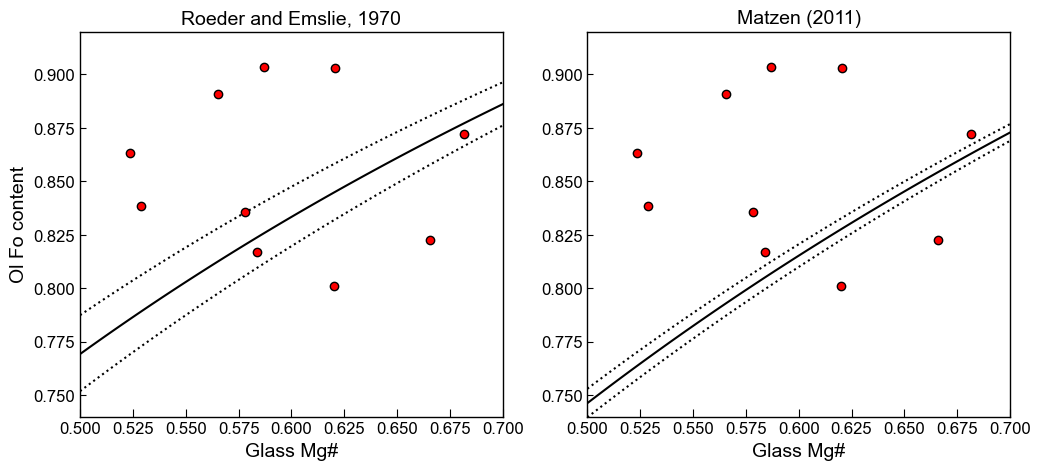

In [28]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# Plotting for Roeder and Emslie
ax1.set_title('Roeder and Emslie, 1970')
# Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k')

# Plotting data
ax1.plot(Liq_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')

ax2.set_title('Matzen (2011)')
# Plotting equilibrium lines
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-k')
# Plotting data
ax2.plot(Liq_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')
ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Glass Mg#')
ax2.set_xlabel('Glass Mg#')
# Adjust axis limits here
ax1.set_ylim([0.74, 0.92])
ax2.set_ylim([0.74, 0.92])
ax1.set_xlim([0.5, 0.7])
ax2.set_xlim([0.5, 0.7])

 - We can also use the fill_between function to show the equilibrium field or you could show the min and max to provide the full range using the fill between function

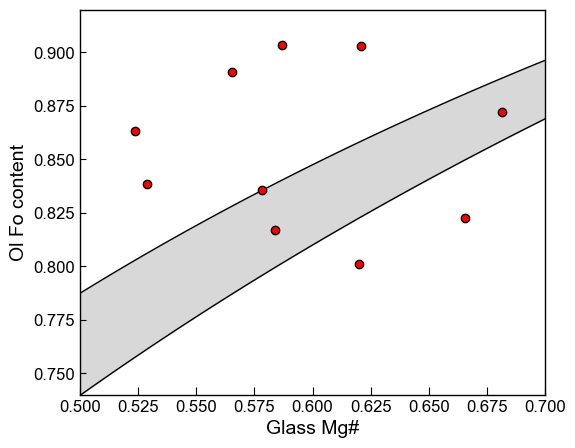

In [29]:
# Calculate Ol Fo contents to plot
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=myOls1)
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=myLiquids1, Fe3Fet_Liq=0.2)
## Here we plot these results
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))

# This section of code fills between the two lines, where xfill_pap is the sorted x co-ordinate, 
# and the y1fill and y2fill are the two y coordinates. You have to have a shared x axis (here, same
# generated set of Mg#s)
xfill_pap = np.sort(Rhodes['Mg#_Liq'])
y1fill_pap = Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)']
y2fill_pap = Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)']
ax1.fill_between(xfill_pap, y1fill_pap, y2fill_pap, where=y1fill_pap < y2fill_pap,
                 interpolate=True, color='grey',  alpha=0.3)
ax1.fill_between(xfill_pap, y1fill_pap, y2fill_pap, where=y1fill_pap > y2fill_pap, 
                 interpolate=True, color='grey', linewidth=0.5, alpha=0.3)


# # Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], '-k', linewidth=1)

ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], '-k', linewidth=1)
# Plotting data
ax1.plot(Liq_Mgno_calc, Ol_Fo_Calc, 'ok', mfc='red')
ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Glass Mg#')
ax1.set_ylim([0.74, 0.92]);
ax1.set_xlim([0.5, 0.7]);

## Example 5 - Calculating Fe3Fet_Liq using a buffer position to assess equilibrium
- Say we don't know the Fe3FeT_Liq we want to perform equilibrium calculations at, but we have reason to believe our system is buffered at NNO+1
- As liquid-olivine temperatures aren't sensitive to fo2, first we calculate temperature (as buffers are highly temperature-sensitive)

In [30]:
eq22_PHinput=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT="T_Put2008_eq22", P=my_input['P_kbar'])

- Then we use this function to convert NNO+1 to a Fe3/FeT ratio (the function returns a dataframe, and the variable we care about is Fe3Fet_Liq)

In [31]:
myLiquids_Fe3_Kress_no_norm_Fe3=pt.convert_fo2_to_fe_partition(liq_comps=myLiquids1, 
                                T_K=eq22_PHinput['T_K_calc'], P_kbar=3, fo2="NNO", fo2_offset=1, 
                                model="Kress1991", renorm=False).Fe3Fet_Liq
myLiquids_Fe3_Kress_no_norm_Fe3

0    0.286549
1    0.294522
2    0.290725
3    0.304642
4    0.288451
5    0.293145
6    0.296381
7    0.276202
8    0.290563
9    0.278905
Name: Fe3Fet_Liq, dtype: float64

- We then input this into the calculate_ol_liq_temp function as Fe3Fet_Liq=....

In [32]:
eq22_PHinput_EqTests=pt.calculate_ol_liq_temp(liq_comps=myLiquids1, ol_comps=myOls1,  
                                      equationT="T_Put2008_eq22", P=my_input['P_kbar'], eq_tests=True, 
                                    Fe3Fet_Liq=myLiquids_Fe3_Kress_no_norm_Fe3)
eq22_PHinput_EqTests

,T_K_calc,Kd Meas,Kd calc (Toplis),"ΔKd, Toplis (M-P)","ΔKd, Roeder (M-P)","ΔKd, Matzen (M-P)","ΔKd, Shea (M-P)",SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol,Fo_meas,DMg_Meas,CNML,CSiO2L,NF,Den_Beat93
0,1290.324455,0.352387,0.325217,0.027170,0.052387,0.012387,0.017387,57.023602,0.623106,16.332899,...,0,0.03,0.0,0,0.872023,9.490384,0.170076,0.556427,-0.760264,9.813745
1,1230.140630,0.198881,0.308907,-0.110026,-0.101119,-0.141119,-0.136119,57.658600,0.654150,17.194799,...,0,0.00,0.0,1,0.903203,14.212311,0.137693,0.568999,-0.815019,10.298404
2,1286.367233,0.304065,0.316263,-0.012198,0.004065,-0.035935,-0.030935,60.731201,0.862054,17.144199,...,0,0.03,0.0,2,0.835656,15.571306,0.121869,0.577797,-0.790522,10.243083
3,1198.532903,0.199954,0.297105,-0.097151,-0.100046,-0.140046,-0.135046,61.532799,0.440860,16.508801,...,0,0.02,0.0,3,0.863386,23.795917,0.097450,0.604665,-0.765547,10.709968
4,1259.546319,0.171088,0.323848,-0.152760,-0.128912,-0.168912,-0.163912,52.969101,0.803412,17.563000,...,0,0.00,0.0,4,0.903278,10.802119,0.186517,0.522022,-0.840343,10.209647
5,1245.276632,0.180579,0.325078,-0.144500,-0.119421,-0.159421,-0.154421,54.050201,0.857348,17.333300,...,0,0.02,0.0,5,0.890781,12.298898,0.167758,0.532846,-0.831744,10.289637
6,1241.721961,0.245491,0.334011,-0.088520,-0.054509,-0.094509,-0.089509,55.656300,0.897984,17.117800,...,0,0.02,0.0,6,0.838609,14.115866,0.145510,0.546226,-0.818818,10.317328
7,1199.614504,0.447306,0.391377,0.055928,0.147306,0.107306,0.112306,49.054699,0.488832,14.665000,...,0,0.00,0.0,7,0.801278,7.372863,0.220036,0.554167,-0.789435,9.844920
8,1162.740690,0.354214,0.361855,-0.007641,0.054214,0.014214,0.019214,50.625099,0.334074,16.875000,...,0,0.00,0.0,8,0.817074,10.512978,0.180240,0.551142,-0.873211,10.228352
9,1339.482412,0.476093,0.299722,0.176371,0.176093,0.136093,0.141093,51.403301,0.663880,18.019600,...,0,0.00,0.0,9,0.822724,7.071114,0.228369,0.498136,-0.840454,9.673521
